Importe


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cleanup

%matplotlib inline

In [2]:
cleanup.generate_cleaned_df()

C:\Users\lassu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\lassu\PycharmProjects\python_visa\cleanup.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

   wage_offer_from wage_offer_unit_of_pay case_received_date decision_date  \
0         75629.00                     yr                NaT    2012-02-01   
1         37024.00                     yr                NaT    2011-12-21   
2         47923.00                     yr                NaT    2011-12-01   
3            10.97                     hr                NaT    2011-12-01   
4        100000.00                     yr                NaT    2012-01-26   

  employer_state    case_number foreign_worker_info_education_other  \
0       NEW YORK  A-07323-97014                                 NaN   
1       NEW YORK  A-07332-99439                                 NaN   
2       VIRGINIA  A-07333-99643                                 NaN   
3       NEW YORK  A-07339-01930                                 NaN   
4       NEW YORK  A-07345-03565                                 NaN   

  country_of_citizenship case_status     us_economic_sector  \
0                ARMENIA   Certified     

Welche Daten sind verfügbar und Laden des Datensatzes

In [2]:
col_list= ["case_status","case_number","case_no", "decision_date", "case_received_date", "employer_city"]
visas_df = pd.read_csv("us_perm_visas.csv", usecols=col_list)
visas_df.head ()

C:\Users\lassu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,case_no,case_number,case_received_date,case_status,decision_date,employer_city
0,A-07323-97014,NaN,NaN,Certified,2012-02-01,NEW YORK
1,A-07332-99439,NaN,NaN,Denied,2011-12-21,CARLSTADT
2,A-07333-99643,NaN,NaN,Certified,2011-12-01,GLEN ALLEN
3,A-07339-01930,NaN,NaN,Certified,2011-12-01,FLUSHING
4,A-07345-03565,NaN,NaN,Certified,2012-01-26,ALBANY


Untersuchung der vorliegenden Daten im Datensatz


In [20]:
# df = pd.read_csv('us_perm_visas.csv', low_memory = False, parse_dates=['decision_date', 'case_received_date'])
visas_df ["decision_date"]=pd.to_datetime(visas_df["decision_date"])
visas_df ["case_received_date"]=pd.to_datetime(visas_df["case_received_date"])

Überprüfung der Anzahl der Visa Bewerbungen bzw. Fälle (Zeilen und Spalten)


In [21]:
print('Number of Visa Applications:', len(visas_df))
print('Number of Columns:', len(visas_df.columns))

Number of Visa Applications: 374362
Number of Columns: 6


Ersten fünf Zeilen anzeigen lassen zum checken

In [22]:
visas_df.head()

,case_no,case_number,case_received_date,case_status,decision_date,employer_city
0,A-07323-97014,NaN,NaT,Certified,2012-02-01,NEW YORK
1,A-07332-99439,NaN,NaT,Denied,2011-12-21,CARLSTADT
2,A-07333-99643,NaN,NaT,Certified,2011-12-01,GLEN ALLEN
3,A-07339-01930,NaN,NaT,Certified,2011-12-01,FLUSHING
4,A-07345-03565,NaN,NaT,Certified,2012-01-26,ALBANY


Letze fünf Zeilen anzeigen lassen zum checken

In [23]:
visas_df.tail()

,case_no,case_number,case_received_date,case_status,decision_date,employer_city
374357,NaN,A-16363-85407,2016-12-29,Withdrawn,2016-12-30,ANAHEIM
374358,NaN,A-16271-56745,2016-12-30,Withdrawn,2016-12-30,REDMOND
374359,NaN,A-16354-82345,2016-12-30,Withdrawn,2016-12-30,YPSILANTI
374360,NaN,A-16357-84250,2016-12-30,Withdrawn,2016-12-30,Phoenix
374361,NaN,A-16279-59292,2016-12-30,Withdrawn,2016-12-30,SANTA CLARA


Namen der Spalten anzeigen lassen


In [24]:
print(visas_df.columns.values)

['case_no' 'case_number' 'case_received_date' 'case_status'
 'decision_date' 'employer_city']


Die Werte case_number und case_no könnten ähnliche Informationen beinhalten. Daher überprüfen wir  Länge, Anzahl der fehlenden Werte und Beispielwerte

In [25]:
print("Length of 'case_number' column is: ", len(visas_df['case_number'])," with",visas_df.case_number.isnull().sum(), "missing values")
print("Length of 'case_no' column is: ", len(visas_df['case_no'])," with", visas_df.case_no.isnull().sum(),"missing values \n")

print("First 2 values of case_number column are : \n", visas_df['case_number'].head(2),"\n")

print("Last 2 values of case_number column are : \n", visas_df['case_number'].tail(2), "\n")
print("First 2 values of case_no column are : \n", visas_df['case_no'].head(2), "\n")
print("Last 2 values of case_no column are : \n", visas_df['case_no'].tail(2))

Length of 'case_number' column is:  374362  with 135269 missing values
Length of 'case_no' column is:  374362  with 239093 missing values 

First 2 values of case_number column are : 
 0    NaN
1    NaN
Name: case_number, dtype: object 

Last 2 values of case_number column are : 
 374360    A-16357-84250
374361    A-16279-59292
Name: case_number, dtype: object 

First 2 values of case_no column are : 
 0    A-07323-97014
1    A-07332-99439
Name: case_no, dtype: object 

Last 2 values of case_no column are : 
 374360    NaN
374361    NaN
Name: case_no, dtype: object


Wie erwartet sind die Werte in case_number und case_no ähnlich. Eine Addition der NaN Werte der Spalten case_number und case_no ergeben die Gesamtzahl der Fälle.
Daher erstellen wir eine neue Spalte die keine fehlenden Werte beinhaltet.

In [26]:
case_noindex = visas_df.columns.get_loc('case_no')
case_noindexnumber = visas_df.columns.get_loc('case_number')
casenumberlist = []


for value in visas_df.iloc[0:135269,case_noindex]:
    casenumberlist.append(value)

for value in visas_df.iloc[135269:374362,case_noindexnumber]:
    casenumberlist.append(value)

visas_df['casenumber'] = casenumberlist
visas_df.drop(visas_df.columns[[case_noindex,case_noindexnumber]], axis=1, inplace=True)

Überprüfung der Spalte case_status, da sie Informationen über den jeweiligen Visumsangetrag gentroffene Entscheidung enthaelt

In [27]:
for value in visas_df.case_status.unique():
    print(len(visas_df[visas_df['case_status'] == value])," occurrences of status '{}'".format(value))

181933  occurrences of status 'Certified'
25649  occurrences of status 'Denied'
148586  occurrences of status 'Certified-Expired'
18194  occurrences of status 'Withdrawn'


Datensatz enthält 18194 Fälle die zurückgezogen wurden 'withdrawn'. Da diese Fälle nicht relevant sind werden sie aus dem Datensatz gelöscht.

In [28]:
visas_df= visas_df[visas_df.case_status != 'Withdrawn']


Der Status 'certified' und der Status 'certified-expired' werden zu dem Wert 'certified' zusammengefasst, sodass es nur noch die Werte 'certified' und 'denied' hat.

Antragssteller des Visas haben nach Erhalt des Status 'certified' 6 Monate Zeit, das Formular I-140 einzureichen, bevor es abläuft und in den Status 'certified-expired' erhält.

Formular I-140 Quelle: Wikipedia
Das Formular I-140, Immigrant Petition for Alien Worker (Einwanderungsantrag für ausländische Arbeitnehmer), ist ein Formular, das von einem potentiellen Arbeitgeber bei den United States Citizenship and Immigration Services (USCIS) eingereicht wird, um einen Ausländer zu ersuchen, dauerhaft in den USA zu arbeiten. Dies geschieht in dem Fall, dass der Arbeitnehmer in gewisser Weise als außergewöhnlich gilt oder wenn es in den USA keine qualifizierten Arbeitskräfte gibt.


In [29]:
visas_df.loc[visas_df.case_status == 'Certified-Expired', 'case_status'] = 'Certified'
visas_df.case_status.value_counts()


Certified    330519
Denied        25649
Name: case_status, dtype: int64

25649 Visa Bewerbungen wurden abgelehnt (7,2%). Jetzt werden Zeilen und Spalten entfernt. NaN Werte in Zeilen und Spalten ausschließen.

In [30]:
visas_df = visas_df.dropna(axis=1, how='all')
visas_df = visas_df.dropna(axis=0, how='all');

visas_df.shape

(356168, 5)

Keine NaN Werte mehr. Welche Spalten haben noch fehlende Werte. Anzeigen lassen der fehlenden Werte

In [31]:
for column in visas_df.columns:
    print("Attribute '{}' contains ".format(column),  visas_df[column].isnull().sum().sum(), "missing values")

Attribute 'case_received_date' contains  126848 missing values
Attribute 'case_status' contains  0 missing values
Attribute 'decision_date' contains  0 missing values
Attribute 'employer_city' contains  10 missing values
Attribute 'casenumber' contains  0 missing values


Einfügen der Spalte Antragsjahr. Dies soll dann in einem Balkendiagramm dargestellt werden um den Verlauf zu sehen. Fehlende Werte sollen spaeter entfernt werden.

[Text(0, 0.5, 'Number of Visa applicatons'),
 Text(0.5, 0, 'Visa application year')]

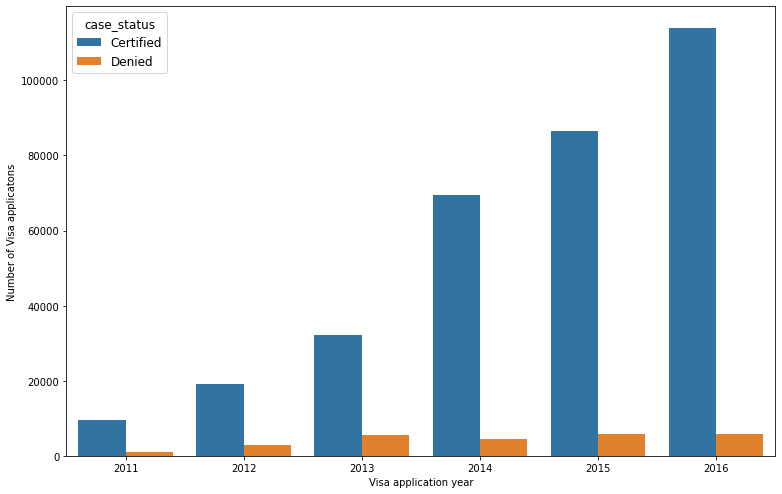

In [32]:
visas_df['year'] = visas_df['decision_date'].dt.year

fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
sns.set_context(rc={"font.size":12})
sns.countplot(x="year", hue="case_status", data=visas_df)
ax.set(xlabel='Visa application year', ylabel='Number of Visa applicatons')

Anzahl der Visa Applications nimmt jedes Jahr zu. Die Anzahl der abgelehnten Anträge scheint seit 2013 zu stagnieren, bzw. ging 2014 leicht zurück

In welchen Städten werden die meisten Visa Applications gestellt?

In [35]:
visas_df['employer_city'] = visas_df['employer_city'].str.upper()
visas_df['employer_city'].value_counts().head(20)

NEW YORK           17198
COLLEGE STATION    11985
SANTA CLARA        10519
SAN JOSE            9147
REDMOND             8485
MOUNTAIN VIEW       8121
HOUSTON             6720
SAN FRANCISCO       6352
SUNNYVALE           6104
PLANO               5607
CHICAGO             5561
SEATTLE             5051
EDISON              4056
LOS ANGELES         4045
SAN DIEGO           3702
DALLAS              3693
PHILADELPHIA        3526
CUPERTINO           3310
PALO ALTO           3229
IRVING              3144
Name: employer_city, dtype: int64

Die beliebtesten Staedte waren in den letzten Jahren New York, College Station, Santa Clara, San Jose und Radmond. Plotten, grafische Darstellung der Visa Applications

[Text(0, 0.5, 'Number of Visa applications'), Text(0.5, 0, 'Employer city')]

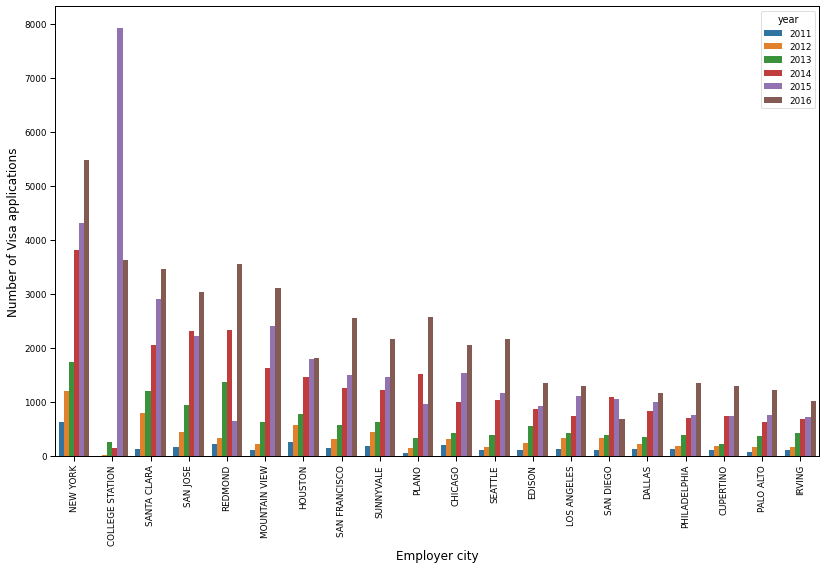

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 8.27)
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
sns.countplot(x='employer_city', hue='year', data=visas_df, order=visas_df.employer_city.value_counts().iloc[:20].index)
plt.xticks(rotation=90)
ax.set(xlabel='Employer city', ylabel='Number of Visa applications')





College Station war im Jahr 2015 besonders beliebt (Begründung?). 2014 und 2016 war New York am beliebtesten. Allgemein ist ein ansteigender Trend der Visa Applications zu beobachten.
